In [30]:
%matplotlib inline
import time
print('Last updated: %s' %time.strftime('%d/%m/%Y'))
import sys
sys.path.insert(0,'..')
from IPython.display import HTML
from helpers import show_hide
HTML(show_hide)

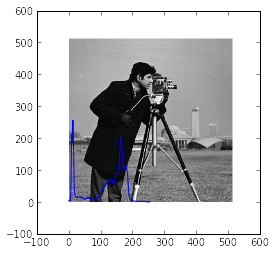

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import camera

im = camera()[-1::-1,::]

h = np.histogram(im[:],range(0,256))
hn = 256*h[0]/np.max(h[0])


plt.imshow(im,cmap=plt.cm.gray,interpolation='nearest',origin='lower')
plt.plot(hn)

plt.show()

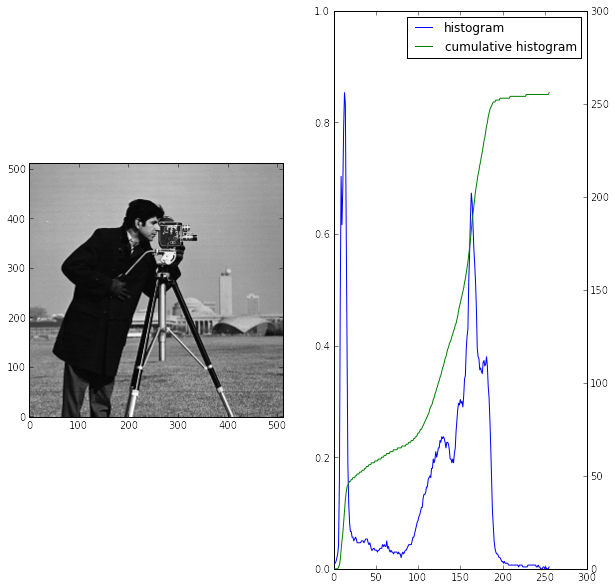

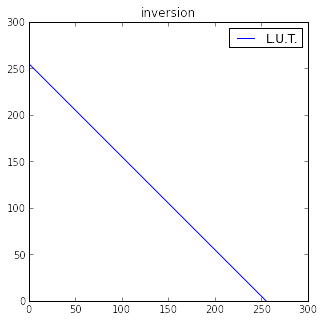

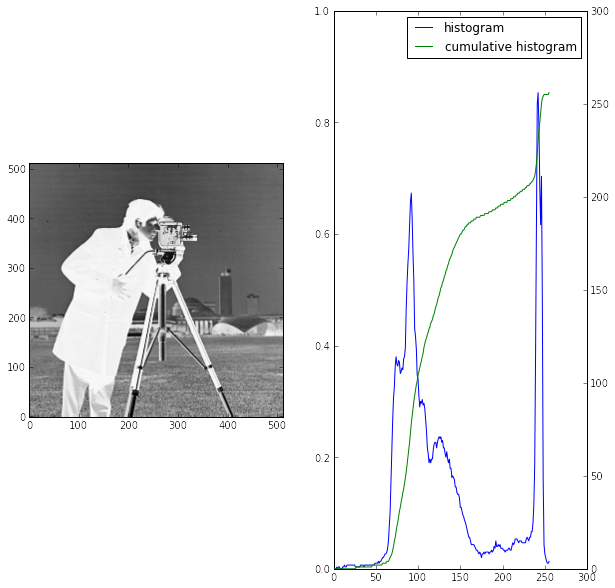

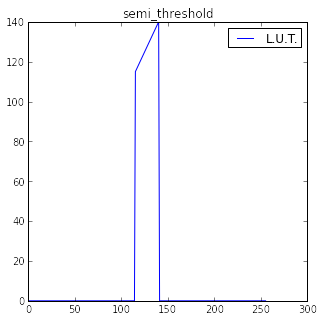

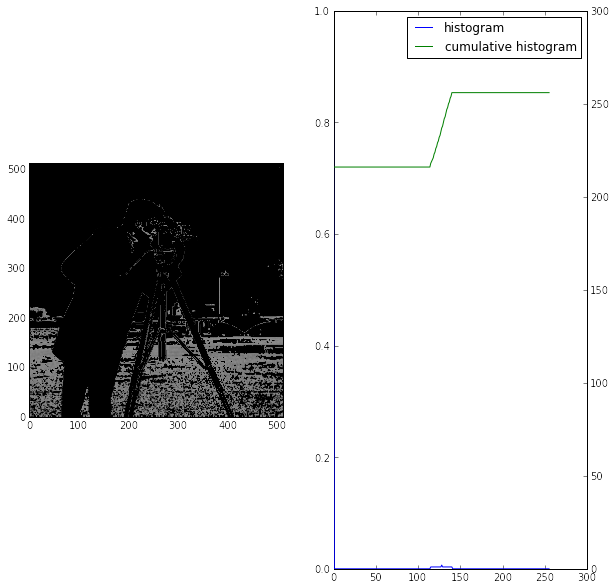

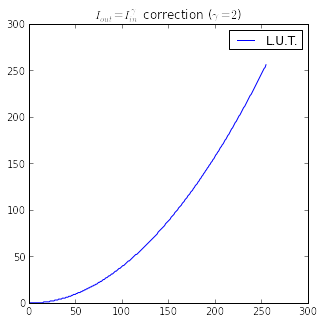

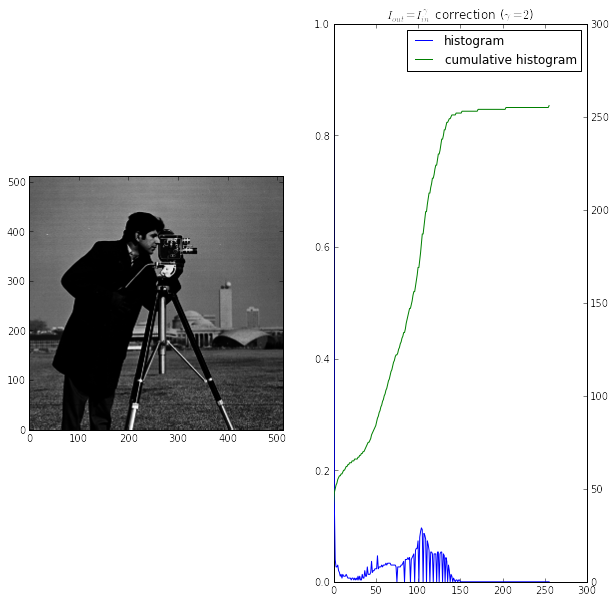

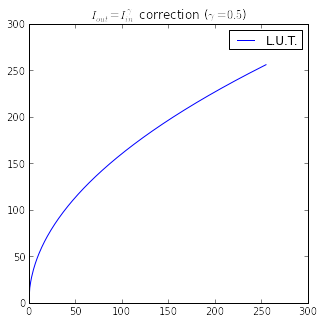

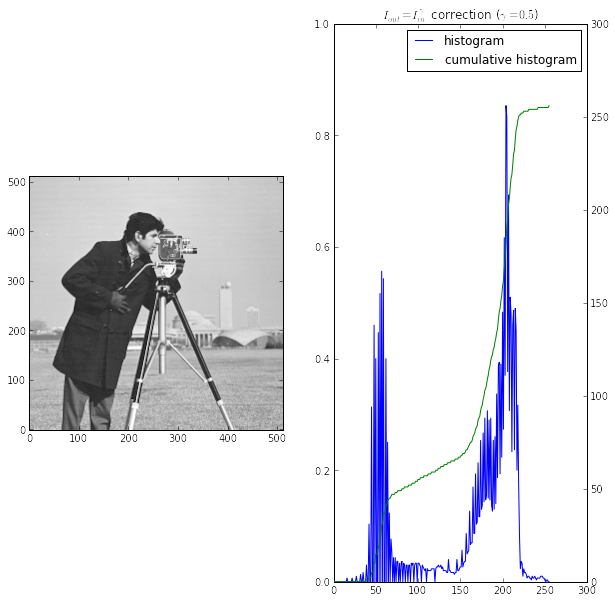

In [37]:
def plot_histo(im):
    h, b = np.histogram(im[:], range(0, 257))
    h_scaled = 256 * h / np.max(h)
    h_cum = np.cumsum(h)
    h_cum_scaled = 256 * h_cum / np.max(h_cum)
    plt.figure(figsize=[10,10])
    ax0 = plt.subplot(1, 2, 1)
    plt.imshow(im, cmap=plt.cm.gray, origin='lower',vmin=0,vmax=255)
    ax1 = plt.subplot(1, 2, 2)
    ax2 = ax1.twinx()
    plt.plot(h_scaled)
    plt.plot(h_cum_scaled)
    ax2.legend(['histogram','cumulative histogram'],loc=1)
    return h


plot_histo(im)
im = im.astype(np.int)

#inversion
lut = np.arange(255,-1,-1)
inv_im = lut[im]

plt.figure(figsize=[5,5])
plt.plot(lut)
plt.legend(['L.U.T.'])
plt.title('inversion')
plot_histo(inv_im)

#semi-threshold
lut = np.arange(0,256)
lut[(lut<115)| (lut>140)]=0

plt.figure(figsize=[5,5])
plt.plot(lut)
plt.legend(['L.U.T.'])
plt.title('semi_threshold')
plot_histo(lut[im])


#gamma correction
lut = np.arange(0,256)
lut = np.power(lut,2)
lut = 256 * lut / np.max(lut)

plt.figure(figsize=[5,5])
plt.plot(lut)
plt.legend(['L.U.T.'])
plt.title('$I_{out} = I_{in}^\gamma$ correction ($\gamma=2$)')

plot_histo(lut[im])
plt.title('$I_{out} = I_{in}^\gamma$ correction ($\gamma=2$)')

lut = np.arange(0,256)
lut = np.power(lut,.5)
lut = 256 * lut / np.max(lut)

plt.figure(figsize=[5,5])
plt.plot(lut)
plt.legend(['L.U.T.'])
plt.title('$I_{out} = I_{in}^\gamma$ correction ($\gamma=0.5$)')

plot_histo(lut[im])
plt.title('$I_{out} = I_{in}^\gamma$ correction ($\gamma=0.5$)')


plt.show()